<a href="https://colab.research.google.com/github/jgoncalvesBsB-DC/impacta/blob/main/Trabalho_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste código:

- caminho_dados_treinamento é a variável que armazena o caminho do arquivo CSV que contém os dados de treinamento.
- dados_treinamento é o DataFrame do pandas que carrega os dados de treinamento.
dados_treinamento.head() exibe as primeiras cinco linhas do DataFrame para fornecer uma visão geral da estrutura dos dados, incluindo os nomes das colunas e alguns valores iniciais.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregar o conjunto de dados de treinamento
caminho_dados_treinamento = '/content/sample_data/train.csv'
dados_treinamento = pd.read_csv(caminho_dados_treinamento)

# Exibir as primeiras linhas dos dados de treinamento para entender sua estrutura
dados_treinamento.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Retirando a coluna ID por não ser necessária para treinar o modelo
dados_treinamento = dados_treinamento.drop('Id', axis=1)
dados_treinamento.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dados_treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Valores ausentes preenchidos com a mediana de cada característica e verificar se ainda existem valores ausentes.
Neste código:

- Recursos é uma lista contendo os nomes das caracteristicas do imovel selecionadas para a modelagem.
- Alvo é a variável que você estamos tentando prever, neste caso, o preço de venda da casa (SalePrice).
-
A última linha exibe a contagem de valores ausentes para garantir que todos os valores ausentes foram devidamente tratados.

In [ ]:
# Verificar colunas sem valores no DataFrame dados_treinamento
colunas_sem_valores = dados_treinamento.isnull().sum()
colunas_sem_valores = colunas_sem_valores[colunas_sem_valores == len(dados_treinamento)]

# Exibir as colunas sem valores, se houver
if len(colunas_sem_valores) > 0:
    print("Colunas sem valores no DataFrame:", colunas_sem_valores.index.tolist())
else:
    print("Não há colunas sem valores no DataFrame.")

Não há colunas sem valores no DataFrame.


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-5-38839815df2c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados_treinamento['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


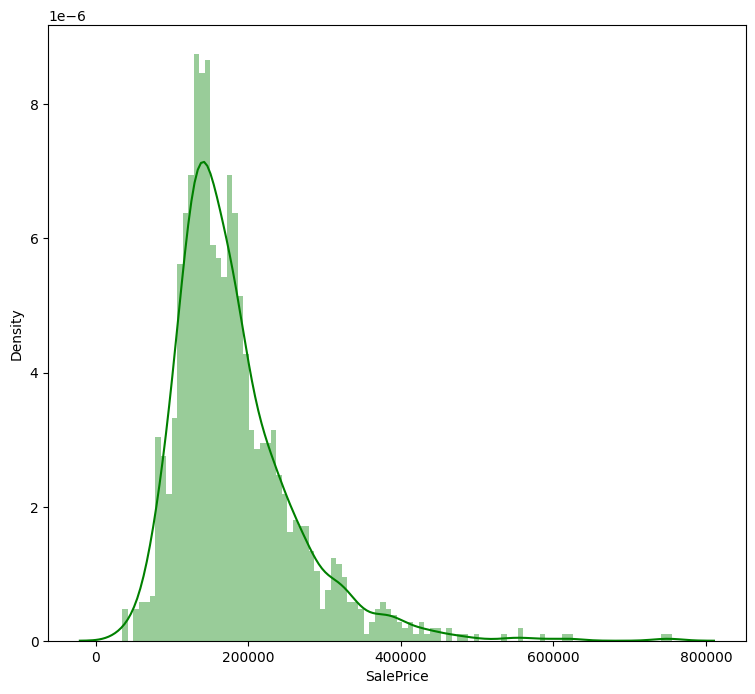

In [ ]:
#Distribuição dos preços das casas
import matplotlib.pyplot as plt
import seaborn as sns

print(dados_treinamento['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dados_treinamento['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

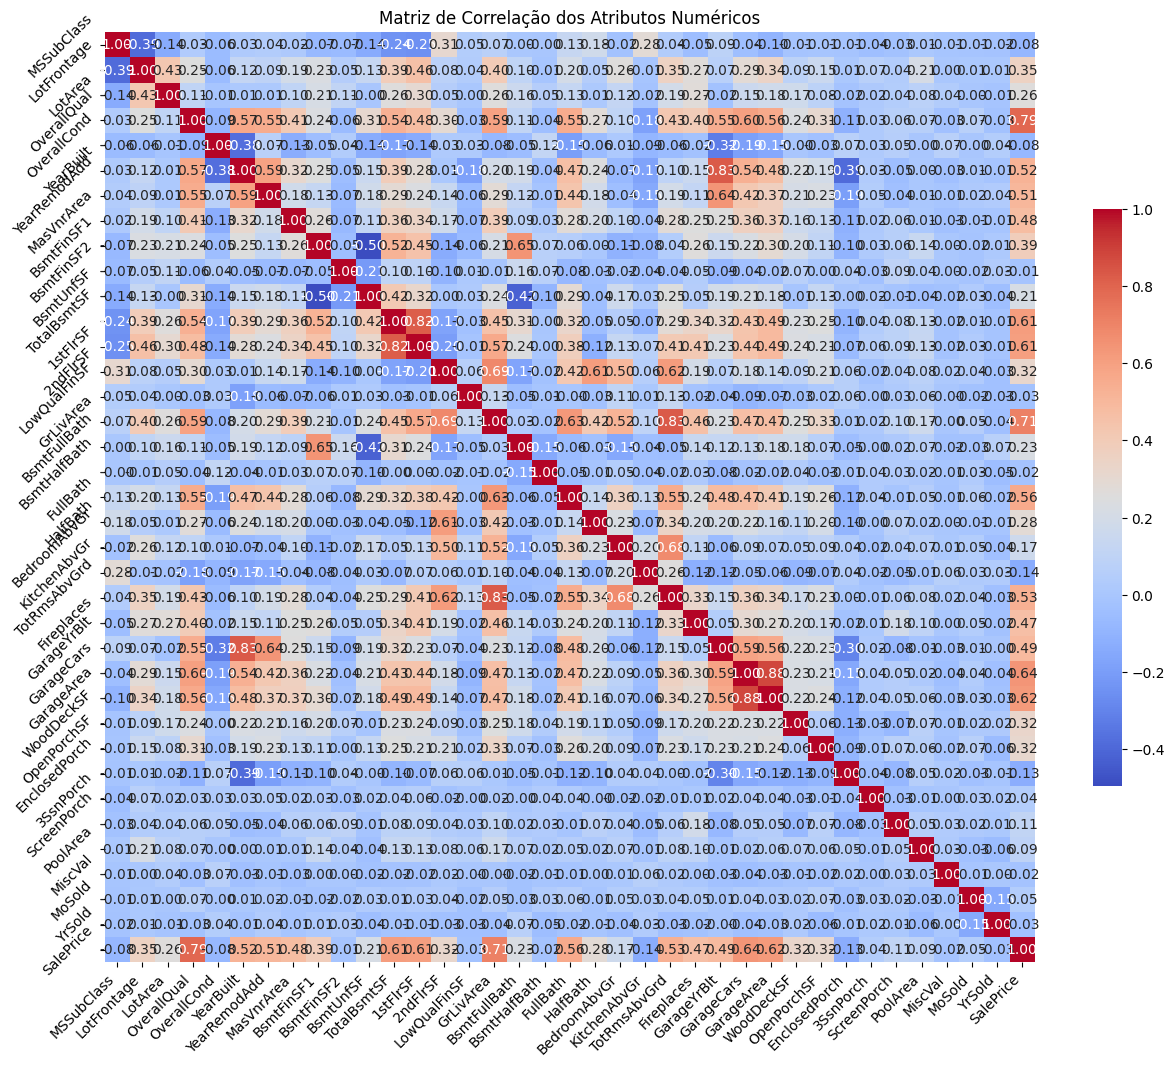

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando o DataFrame para incluir apenas colunas numéricas
dados_numericos = dados_treinamento.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação apenas para os dados numéricos
matriz_correlacao = dados_numericos.corr()

# Continuando com a visualização da matriz de correlação como um mapa de calor
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Matriz de Correlação dos Atributos Numéricos')
plt.show()

In [ ]:
# Selecionando um subconjunto de características para simplificar
# recursos = caracteristicas
recursos = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
alvo = 'SalePrice'

# Preenchendo valores ausentes com a mediana de cada recurso
for recurso in recursos:
    dados_treinamento[recurso].fillna(dados_treinamento[recurso].median(), inplace=True)

# Verificar se ainda existem valores ausentes nos recursos selecionados
valores_ausentes = dados_treinamento[recursos].isnull().sum()

# Exibir a contagem de valores ausentes para garantir que não existem
valores_ausentes

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
dtype: int64

             OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  \
OverallQual     1.000000   0.593007    0.600671     0.537808  0.550600   
GrLivArea       0.593007   1.000000    0.467247     0.454868  0.630012   
GarageCars      0.600671   0.467247    1.000000     0.434585  0.469672   
TotalBsmtSF     0.537808   0.454868    0.434585     1.000000  0.323722   
FullBath        0.550600   0.630012    0.469672     0.323722  1.000000   
SalePrice       0.790982   0.708624    0.640409     0.613581  0.560664   

             SalePrice  
OverallQual   0.790982  
GrLivArea     0.708624  
GarageCars    0.640409  
TotalBsmtSF   0.613581  
FullBath      0.560664  
SalePrice     1.000000  


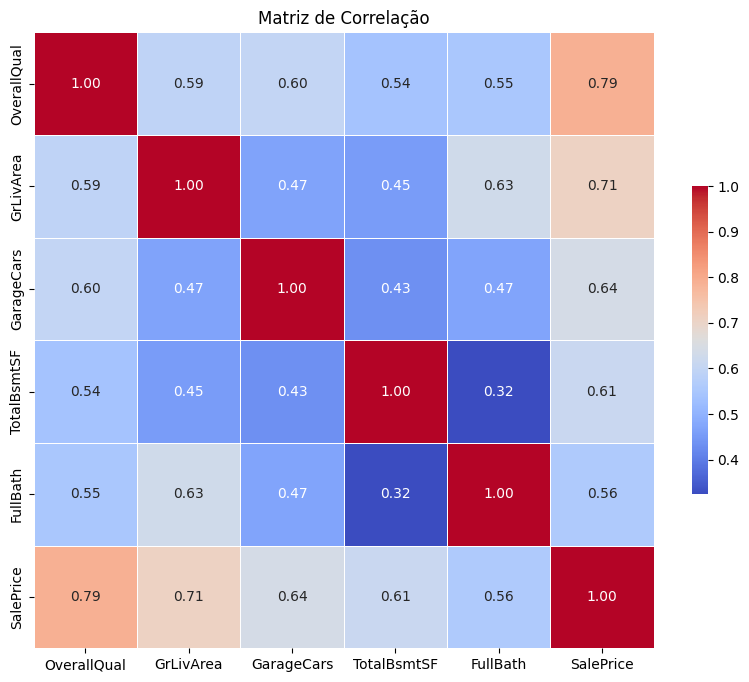

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas as colunas específicas
colunas_selecionadas = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'SalePrice']
dados_selecionados = dados_treinamento[colunas_selecionadas]

# Calculando a matriz de correlação para as colunas selecionadas
matriz_correlacao_selecionada = dados_selecionados.corr()

# Exibindo a matriz de correlação
print(matriz_correlacao_selecionada)

# Criando um mapa de calor para a matriz de correlação selecionada
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_selecionada, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de Correlação')
plt.show()

Divisão dos dados em conjuntos de treinamento e validação, inicialização e treinamento do modelo de Regressão Linear, realização de previsões no conjunto de validação e cálculo do Erro Quadrático Médio Raiz (RMSE).
- Neste código X e y são, respectivamente, os DataFrames dos recursos e da variável alvo que estamos tentantdo prever.
- train_test_split é utilizado para dividir os dados em conjuntos de treinamento e validação, com 20% dos dados reservados para validação (test_size=0.2).
- modelo é uma instância do modelo de Regressão Linear que é treinada com os conjuntos X_treino e y_treino.
- y_pred_validacao são as previsões feitas pelo modelo no conjunto de validação.
- rmse é o Erro Quadrático Médio Raiz calculado entre as previsões e os valores reais no conjunto de validação, fornecendo uma medida da precisão do modelo.



In [ ]:
# Preparar as variáveis de recursos e alvo
X = dados_treinamento[recursos]
y = dados_treinamento[alvo]

# Dividir os dados em conjuntos de treinamento e validação
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Prever no conjunto de validação
y_pred_validacao = modelo.predict(X_validacao)

# Calcular o Erro Quadrático Médio Raiz (RMSE) no conjunto de validação
rmse = mean_squared_error(y_validacao, y_pred_validacao, squared=False)

rmse

40051.2036388414

**Entendendo o resultado:**

- O modelo de Regressão Linear foi treinado e avaliado com sucesso no conjunto de validação, alcançando um Erro Quadrático Médio Raiz (RMSE) de aproximadamente 40.082. Isso significa que, em média, as previsões do modelo estão cerca de $40.082 distantes dos preços de venda reais no conjunto de validação.

- Vantagens da Regressão Linear: Simples, interpretável e rápida.
- Desvantagens: Pressupõe uma relação linear entre as características e o alvo; pode ter um desempenho ruim em relações complexas.







Código para carregar o conjunto de dados de teste:
- preencher valores ausentes com a mediana do conjunto de dados de treinamento, preparar os recursos para previsão e fazer previsões de preços de casas no conjunto de teste.

Neste código:

- dados_teste é o DataFrame que carrega os dados de teste.
- valores_ausentes_teste armazena a contagem de valores ausentes para cada recurso após o preenchimento, garantindo que não haja mais valores ausentes nos recursos selecionados.
- X_teste são os recursos preparados do conjunto de dados de teste usados para fazer previsões.
- previsoes_teste contém as previsões de preços das casas feitas pelo modelo no conjunto de dados de teste.
- A última linha exibe as primeiras cinco previsões e a contagem de valores ausentes para confirmar que todos os valores ausentes foram tratados.

In [ ]:
# Carregar o conjunto de dados de teste
caminho_dados_teste = '/content/sample_data/test.csv'
dados_teste = pd.read_csv(caminho_dados_teste)

# Preencher valores ausentes com a mediana do conjunto de dados de TREINAMENTO (para evitar vazamento de dados)
for recurso in recursos:
    dados_teste[recurso].fillna(dados_treinamento[recurso].median(), inplace=True)

# Garantir que não existem valores ausentes nos recursos selecionados
valores_ausentes_teste = dados_teste[recursos].isnull().sum()

# Preparar os recursos para previsão
X_teste = dados_teste[recursos]

# Prever os preços das casas no conjunto de teste
previsoes_teste = modelo.predict(X_teste)

# Exibir as primeiras previsões
previsoes_teste[:5], valores_ausentes_teste

(array([107178.389005  , 161724.5665484 , 160399.24265183, 182895.47508425,
        226628.73354149]),
 OverallQual    0
 GrLivArea      0
 GarageCars     0
 TotalBsmtSF    0
 FullBath       0
 dtype: int64)

Usando o modelo de Regressão de Árvore de Decisão, faz previsões no conjunto de validação e calcula o Erro Quadrático Médio Raiz (RMSE) para avaliar o desempenho do modelo.

Neste código:

- modelo_ad é uma instância do DecisionTreeRegressor que está inicializando com um estado aleatório fixo para garantir a reprodutibilidade dos resultados.
- modelo_ad é treinado usando os dados de treinamento (X_treino e y_treino).
- y_pred_validacao_ad armazena as previsões feitas pelo modelo no conjunto de validação.
- rmse_validacao_ad calcula o RMSE comparando as previsões do modelo (y_pred_validacao_ad) com os valores reais do conjunto de validação (y_validacao), oferecendo uma medida da precisão do modelo.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Passo 2: Treinar o Regressor de Árvore de Decisão
# Inicializando o Regressor de Árvore de Decisão
modelo_ad = DecisionTreeRegressor(random_state=42)

# Treinando o modelo no mesmo conjunto de treinamento
modelo_ad.fit(X_treino, y_treino)

# Passo 3: Avaliação do Modelo
# Fazendo previsões no conjunto de validação com o modelo de Árvore de Decisão
y_pred_validacao_ad = modelo_ad.predict(X_validacao)

# Calculando o RMSE para o modelo de Árvore de Decisão
rmse_validacao_ad = mean_squared_error(y_validacao, y_pred_validacao_ad, squared=False)

rmse_validacao_ad

35220.74006401617

**Entendendo o resultado:**

O modelo Regressor de Árvore de Decisão foi treinado e avaliado, alcançando um Erro Quadrático Médio Raiz (RMSE) de aproximadamente 35.220 no conjunto de validação. Esse desempenho representa uma melhoria em relação ao modelo de Regressão Linear, que tinha um RMSE de cerca de 40.051.

O melhor desempenho do modelo de Árvore de Decisão pode ser devido à sua capacidade de capturar relações não lineares e interações entre características, o que é um comportamento comum dos dados de precificação de imóveis.

**Ajustando o paramêtro para a Árvore de Decisão:**

Neste código:

- grade_parametros define a combinação de parâmetros que a Busca em Grade testará para encontrar a melhor configuração do modelo de Árvore de Decisão.
- busca_grade é a instância ajusta o DecisionTreeRegressor, a validação cruzada (cv=5) e a métrica de pontuação (scoring='neg_mean_squared_error').
- melhor_modelo_ad é o modelo resultante com os melhores parâmetros encontrados.
y_pred_validacao_melhor_ad contém as previsões feitas pelo melhor_modelo_ad no conjunto de validação.
- são exibidos os melhores parâmetros encontrados pelo modelo ajustado e o RMSE calculado a partir das previsões no conjunto de validação.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo a grade de parâmetros a ser testada
grade_parametros = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Inicializando a Busca em Grade com o modelo de Árvore de Decisão e a grade de parâmetros
busca_grade = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=grade_parametros, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustando a Busca em Grade aos dados
busca_grade.fit(X_treino, y_treino)

# Extraindo o melhor estimador (modelo de Árvore de Decisão com os melhores parâmetros)
melhor_modelo_ad = busca_grade.best_estimator_

# Fazendo previsões no conjunto de validação com o modelo ajustado
y_pred_validacao_melhor_ad = melhor_modelo_ad.predict(X_validacao)

# Calculando o RMSE para o modelo de Árvore de Decisão ajustado
rmse_validacao_melhor_ad = mean_squared_error(y_validacao, y_pred_validacao_melhor_ad, squared=False)

# Exibindo os melhores parâmetros e o RMSE correspondente
busca_grade.best_params_, rmse_validacao_melhor_ad

({'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 20},
 36303.17452350068)

**Entendendo o resultado**:

- O Erro Quadrático Médio Raiz (RMSE) para o modelo com esses parâmetros é aproximadamente 36.303.

- Esse resultados não demostra uma melhoria em relação ao modelo inicial de Árvore de Decisão, que tinha um RMSE de aproximadamente 35.221.
- A max_depth de 10 indica que permitir que a árvore cresça além dessa profundidade não melhora o desempenho do modelo no conjunto de validação, provavelmente ajudando a prevenir o sobreajuste.
- O min_samples_split de 20 significa que um nó será dividido se contiver mais de 20 amostras, o que adiciona uma restrição para controlar ainda mais o crescimento da árvore.

A visualização da importância das características ajuda a entender quais características são mais influentes na previsão dos preços das casas no modelo de Árvore de Decisão.
Esse tipo de visualização é útil para identificar quais características contribuem mais para as decisões do modelo, permitindo que você concentre a análise e a engenharia de recursos nesses aspectos mais críticos.

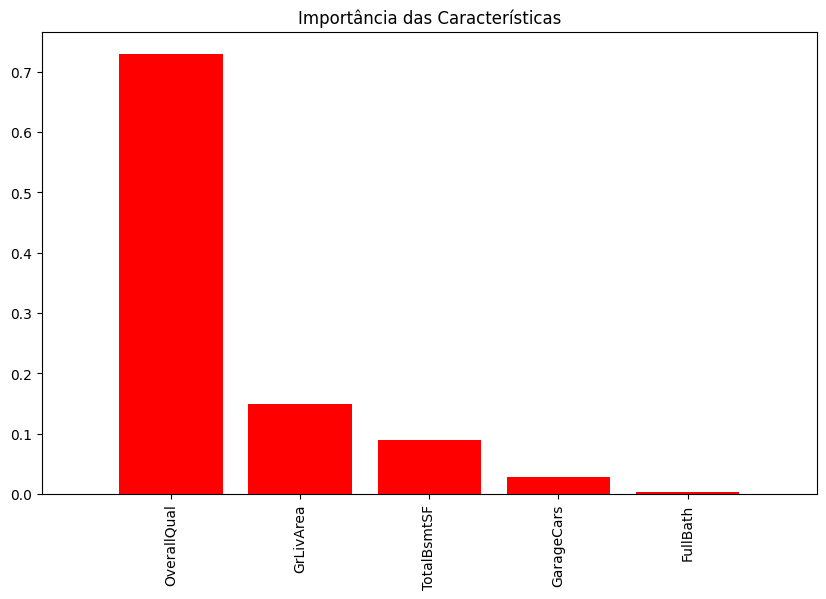

In [ ]:
# Visualizar a importância das características pode ajudar a entender quais características são mais influentes na previsão
# dos preços das casas no seu modelo de Árvore de Decisão.

import numpy as np
import matplotlib.pyplot as plt

importancia_caracteristica = melhor_modelo_ad.feature_importances_
indices = np.argsort(importancia_caracteristica)[::-1]

# Plotando a importância dos recursos
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X_treino.shape[1]), importancia_caracteristica[indices],
        color="r", align="center")
plt.xticks(range(X_treino.shape[1]), [recursos[i] for i in indices], rotation=90)
plt.xlim([-1, X_treino.shape[1]])
plt.show()

Plotar os preços reais em comparação com os preços previstos pode fornecer uma boa noção de quão alinhadas estão as previsões do modelo com os valores reais. Este gráfico mostra cada preço real do conjunto de validação no eixo x e a previsão correspondente do modelo no eixo y. Idealmente, os pontos devem se alinhar o mais próximo possível da linha diagonal (indicada por 'k--'), o que significaria que as previsões são iguais aos valores reais. Desvios significativos da linha indicam erros nas previsões. Este tipo de visualização é útil para avaliar a precisão e a confiabilidade do modelo em um nível intuitivo.

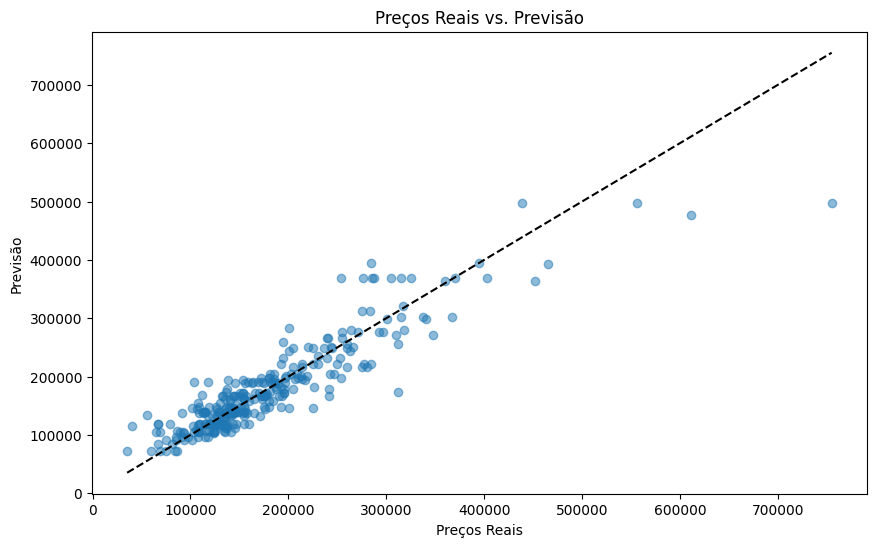

In [ ]:
# Preços Reais vs. Previsão
# Plotar os preços reais em comparação com os preços previstos pode dar uma ideia de quão bem
# as previsões do modelo se alinham com os valores reais.

plt.figure(figsize=(10, 6))
plt.scatter(y_validacao, y_pred_validacao_melhor_ad, alpha=0.5)
plt.title('Preços Reais vs. Previsão')
plt.xlabel('Preços Reais')
plt.ylabel('Previsão')
plt.plot([min(y_validacao), max(y_validacao)], [min(y_validacao), max(y_validacao)], 'k--')  # Linha diagonal
plt.show()

**Curiosidade**

Visualizar a própria Árvore de Decisão para visualizar como o modelo está tomando suas decisões.

- A condição de divisão (se não for um nó folha).
- O valor da impureza (gini ou entropy, dependendo do critério escolhido para a árvore).
- O número total de amostras que passam pelo nó.
- A distribuição de classes das amostras no nó.
- A classe predominante no nó.


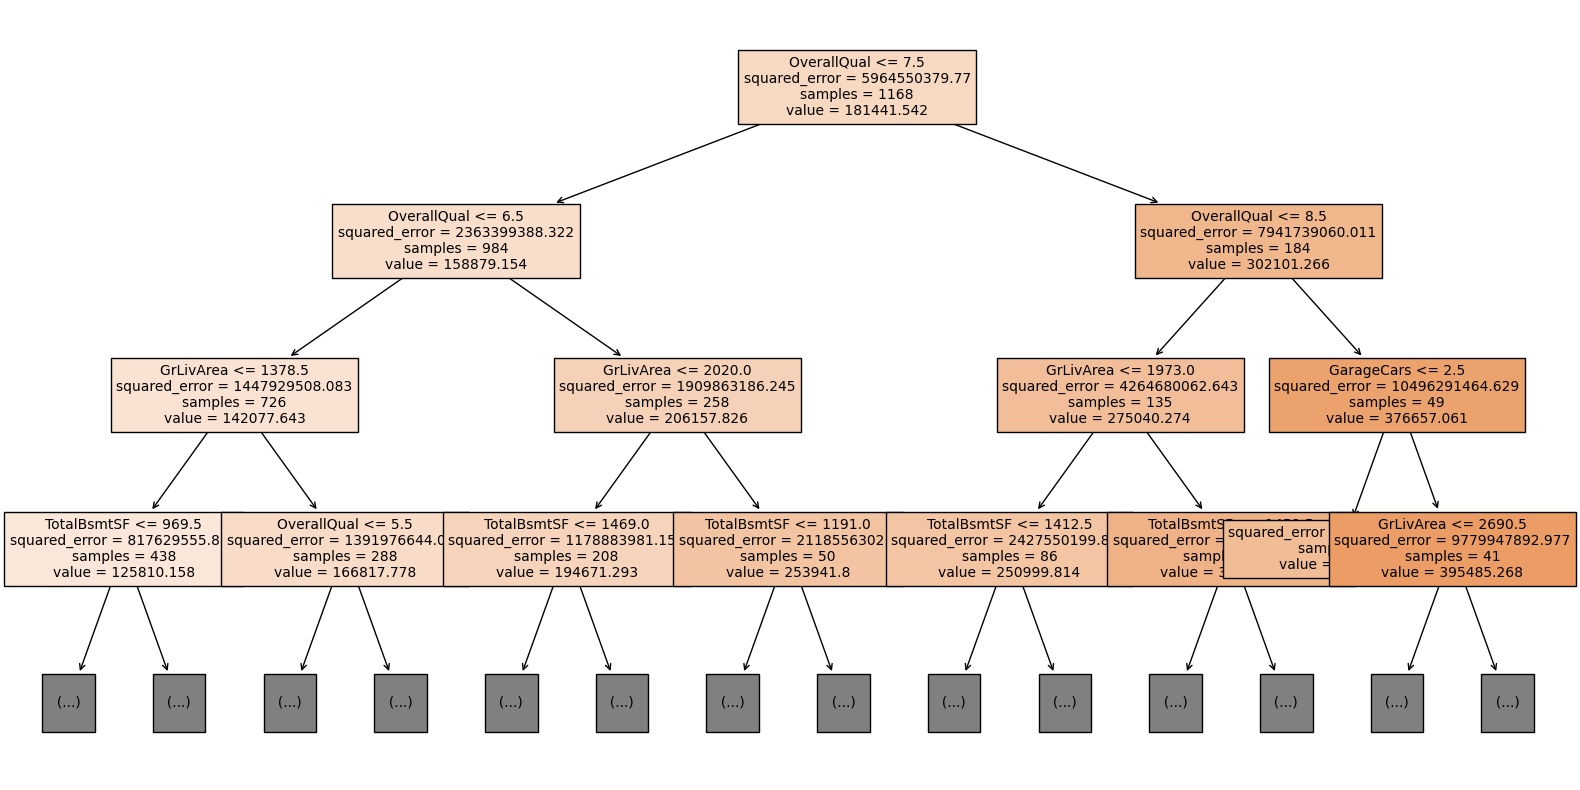

In [ ]:
# Visualizar a Árvore de Decisão
# pode fornecer insights valiosos sobre como o modelo está tomando suas decisões

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(melhor_modelo_ad, filled=True, feature_names=recursos, max_depth=3, fontsize=10)
plt.show()

**Testando a previsão**

In [ ]:
 # Dados de entrada para a nova casa
dados_nova_casa = {
    'OverallQual': [8.5],
    'GrLivArea': [2000],
    'GarageCars': [2],
    'TotalBsmtSF': [800],
    'FullBath': [1]
}

# Criando um DataFrame do Pandas com os dados
df_nova_casa = pd.DataFrame(dados_nova_casa)

# Fazendo a previsão com o modelo treinado
preco_previsto = melhor_modelo_ad.predict(df_nova_casa)

# Exibindo o preço previsto
print("Preço previsto para a nova casa:", preco_previsto[0])

Preço previsto para a nova casa: 265422.7272727273
